# Exploratory Data Analysis

My journey into AI sparked with my first interaction with ChatGPT, evoking a deep fascination. Despite decades of discourse around AI, firsthand experience was truly overwhelming. This led me to explore Machine Learning and Deep Learning techniques.
Although I'm not naturally gifted in math, I'm dedicated to learning and exploring these fields. The deeper I delve into mathematics, the more captivating it becomes.
    
In this arduous journey, Python serves as the backbone. It's a versatile language, easily adaptable to the challenges of AI exploration. 

Although I have grown accustomed to ML modeling, I often encounter challenges during the EDA process. To address this, I've decided to keep a dedicated notebook solely for EDA. The initial insights gained from data exploration are crucial for a better understanding. Here are some questions we should ask while examining the data:
 1. If this feature is definetly going to be 'The predictor feature'
 2. Can we combine 2 or more feature to single feature
 3. Is the feature exbhiting multicollinearity 
 4. Is feature scaling required    
 5. Is my target variable balanced 
 
 
 Lets Dive into it..!!

### Import Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import a sample dataset

In [5]:
data = pd.read_csv('.././csv/EDA_Dataset.csv')
df = pd.DataFrame(data)

In [4]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.1328,0.1980,NaN,0.1809,NaN,...,16.67,152.2,1575.0,0.1374,NaN,0.4000,0.1625,0.2364,0.07678,0


### First Step is see the basic information

The info gives very useful insights:

        1. Shape of Data
        2. No. of Columns
        3. Datatype of the columns
        4. Rowcount of not null rows for each column
        5. Total column count data type wise    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              482 non-null    float64
 1   mean texture             492 non-null    float64
 2   mean perimeter           513 non-null    float64
 3   mean area                403 non-null    float64
 4   mean smoothness          384 non-null    float64
 5   mean compactness         480 non-null    float64
 6   mean concavity           439 non-null    float64
 7   mean concave points      382 non-null    float64
 8   mean symmetry            471 non-null    float64
 9   mean fractal dimension   504 non-null    float64
 10  radius error             475 non-null    float64
 11  texture error            434 non-null    float64
 12  perimeter error          381 non-null    float64
 13  area error               494 non-null    object 
 14  smoothness error         4

### Interpretation
        1. Shape of Data :  569 entries
        2. No. of Columns : 31
        3. Datatype of the columns : float64, int64, object
        4. Rowcount of not null rows for each column : Non-Null Count for each column
        5. Total column count data type wise : float64(29), int64(1), object(1)

### Null Values
    Absolutely, communicating the presence of null values effectively to stakeholders is crucial. Providing the percentage of missing values in each column along with visualizations can offer a clear understanding of the data quality issues. This approach not only quantifies the extent of missing data but also helps stakeholders grasp the impact on the overall dataset.

### Find % of null values in each column and sort values in decending order
Indeed, visualizing the distribution of null values across columns enables us to identify which columns are most affected by missing data. This visualization aids in prioritizing data cleaning efforts and informing stakeholders about potential data quality issues in specific columns.

In [9]:
s_na = (df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False)
s_na

concavity error            33.391916
perimeter error            33.040422
mean concave points        32.864675
mean smoothness            32.513181
mean area                  29.173989
worst symmetry             27.943761
fractal dimension error    27.592267
worst texture              27.240773
texture error              23.725835
mean concavity             22.847100
compactness error          19.859402
worst perimeter            19.156415
worst smoothness           17.750439
worst fractal dimension    17.398946
mean symmetry              17.223199
worst compactness          16.695958
radius error               16.520211
worst radius               16.520211
mean compactness           15.641476
mean radius                15.289982
symmetry error             14.411248
mean texture               13.532513
smoothness error           13.532513
area error                 13.181019
worst concave points       13.005272
mean fractal dimension     11.423550
concave points error       10.896309
w

### Plot the % in bar chat to get clear visualization

<Axes: >

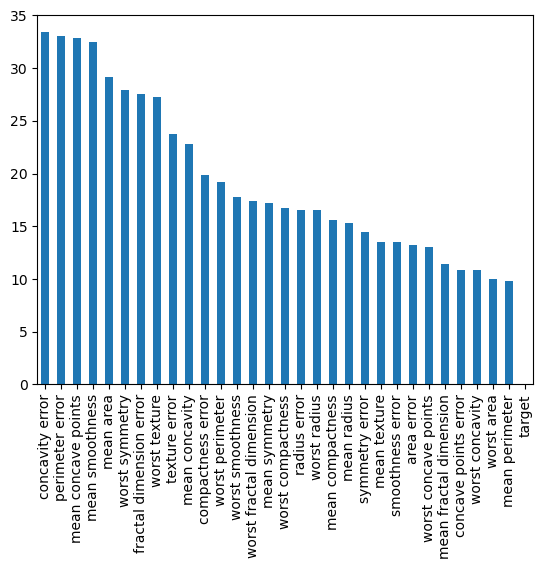

In [11]:
s_na.plot(kind='bar')

### Statistical Discription

This description provides us with valuable insights into the depth of the data:

    1. It offers counts, central tendencies, and customized percentiles, giving us a comprehensive understanding of the
       distribution of values within each column.
    2. The range from minimum to maximum values provides a quick overview of the magnitude of each column, aiding in
       understanding the scale and potential variability of the data.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,482.0,14.059548,3.501791,6.981000,11.672500,13.280000,15.745000,28.11000
mean texture,492.0,19.311829,4.347769,9.710000,16.170000,18.860000,21.802500,39.28000
mean perimeter,513.0,92.039025,24.028669,43.790000,75.270000,86.340000,104.700000,188.50000
mean area,403.0,661.522581,356.669534,143.500000,428.100000,556.700000,796.000000,2501.00000
mean smoothness,384.0,0.097156,0.014502,0.052630,0.086688,0.096565,0.106825,0.16340
mean compactness,480.0,0.104531,0.053335,0.019380,0.064815,0.093125,0.130325,0.34540
mean concavity,439.0,0.094063,0.083301,0.000000,0.030410,0.068240,0.135100,0.42680
mean concave points,382.0,0.049115,0.038449,0.000000,0.020682,0.033770,0.074122,0.20120
mean symmetry,471.0,0.181405,0.027633,0.106000,0.161950,0.179100,0.196600,0.29060
mean fractal dimension,504.0,0.062626,0.007102,0.049960,0.057530,0.061300,0.066003,0.09744


### Interpretation

    1. The magnitude of the columns varies, with most falling within the range of 10s, some in the range of 100s, 
       and features  like mean area and worst area being in the 1000s.

    2. In a normal distribution, the 50th percentile (median) typically falls exactly between the minimum and maximum range. 
       While most distributions adhere to this pattern, a few exhibit skewness. For instance, in the case of Mean Area, 
       with a  minimum of 143.5 and a maximum of 2501, the median should ideally be around 1350. However, it's observed to 
       be 56.7, indicating a right-tailed or right-skewed distribution.

    3. Customizing percentiles allows us to analyze outliers or skewness more effectively, providing deeper insights into 
       the distribution of data.  
       After the 75th percentile, the distribution of mean area starts to skew, deviating from the expected normal
       distribution pattern. This indicates a potential presence of outliers or irregularities in the data beyond 
       this point, warranting further investigation and consideration during data analysis.

In [15]:
df.describe(percentiles=[.05,.25,.50,.75,.90]).T

,count,mean,std,min,5%,25%,50%,75%,90%,max
mean radius,482.0,14.059548,3.501791,6.981000,9.439400,11.672500,13.280000,15.745000,19.436000,28.11000
mean texture,492.0,19.311829,4.347769,9.710000,13.071000,16.170000,18.860000,21.802500,25.108000,39.28000
mean perimeter,513.0,92.039025,24.028669,43.790000,60.922000,75.270000,86.340000,104.700000,129.100000,188.50000
mean area,403.0,661.522581,356.669534,143.500000,279.690000,428.100000,556.700000,796.000000,1187.600000,2501.00000
mean smoothness,384.0,0.097156,0.014502,0.052630,0.075221,0.086688,0.096565,0.106825,0.115560,0.16340
mean compactness,480.0,0.104531,0.053335,0.019380,0.041970,0.064815,0.093125,0.130325,0.174030,0.34540
mean concavity,439.0,0.094063,0.083301,0.000000,0.004926,0.030410,0.068240,0.135100,0.211220,0.42680
mean concave points,382.0,0.049115,0.038449,0.000000,0.006431,0.020682,0.033770,0.074122,0.097101,0.20120
mean symmetry,471.0,0.181405,0.027633,0.106000,0.140700,0.161950,0.179100,0.196600,0.214900,0.29060
mean fractal dimension,504.0,0.062626,0.007102,0.049960,0.053783,0.057530,0.061300,0.066003,0.072144,0.09744


### Statistical description of Object or Category column

This analysis provides several key insights into the dataset:

    1. Count: It indicates the total number of observations or rows in the dataset.
    2. Unique Rows: This represents the count of distinct or unique rows in the dataset, helping to identify any 
       duplicate entries.
    3. Mode: The mode of a column refers to the value that appears most frequently. Along with the mode, the number 
       of occurrences of this value is also provided, highlighting the most common value in the dataset.

In [17]:
df.describe(include=['object']).T

,count,unique,top,freq
area error,494,3,A,489


### Histogram to check the data distribution of each feature

A histogram is an excellent tool for visualizing the distribution of each feature in a dataset. By plotting the 
frequency of values within predefined intervals (bins), histograms provide insights into the shape, central tendency, 
and spread of the data distribution for each feature. Analyzing histograms can help identify patterns such as normal 
distributions, skewness, or outliers, aiding in further data exploration and analysis

As discussed above you can see a right skewed distribution for mean area. Right-skewed distributions, also known as positively skewed distributions, are characterized by a long tail extending to the right of the peak. In the context of mean area, this indicates that while most observations cluster around smaller values, there are relatively fewer but larger values that contribute to the long tail on the right side of the distribution. This skewness may influence the mean and affect statistical analyses that assume normality. It's important to be mindful of this skewness when interpreting results or making inferences based on the mean area variable.

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>],
       [<Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>]], dtype=object)

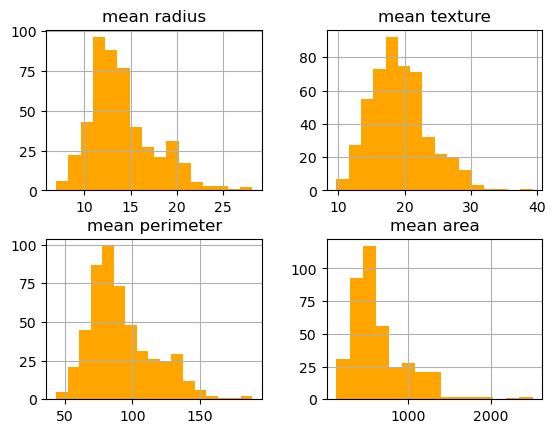

In [36]:
# To select first 4 columns
df.iloc[:,:4].hist(bins='rice',color ='orange') #rice selects bins suitable for each feature

### Bar or Count plot to check the values for categorical Variables

Bar or count plots are effective for visualizing the distribution of categorical variables in a dataset. By displaying the frequency or count of each category as bars, these plots provide a clear overview of the distribution of categorical data. They help identify the most common categories and any potential imbalances or irregularities in the dataset, enabling better understanding and interpretation of categorical variables.

<Axes: xlabel='area error'>

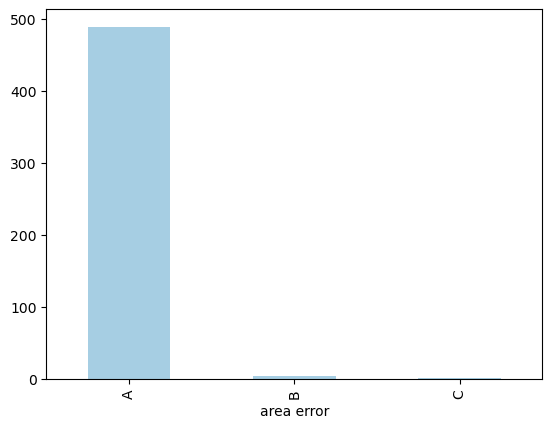

In [37]:
df['area error'].value_counts().plot(kind='bar',colormap='Paired')

### Pair Plots
Pair plots, also known as scatterplot matrices, are powerful visualization tools for exploring relationships between multiple variables in a dataset. Each pair of variables is represented by a scatterplot, allowing for the visualization of the relationships, correlations, and distributions between them. Pair plots enable quick identification of patterns, trends, and potential dependencies among variables, making them invaluable for data exploration and analysis, particularly in multivariate datasets.

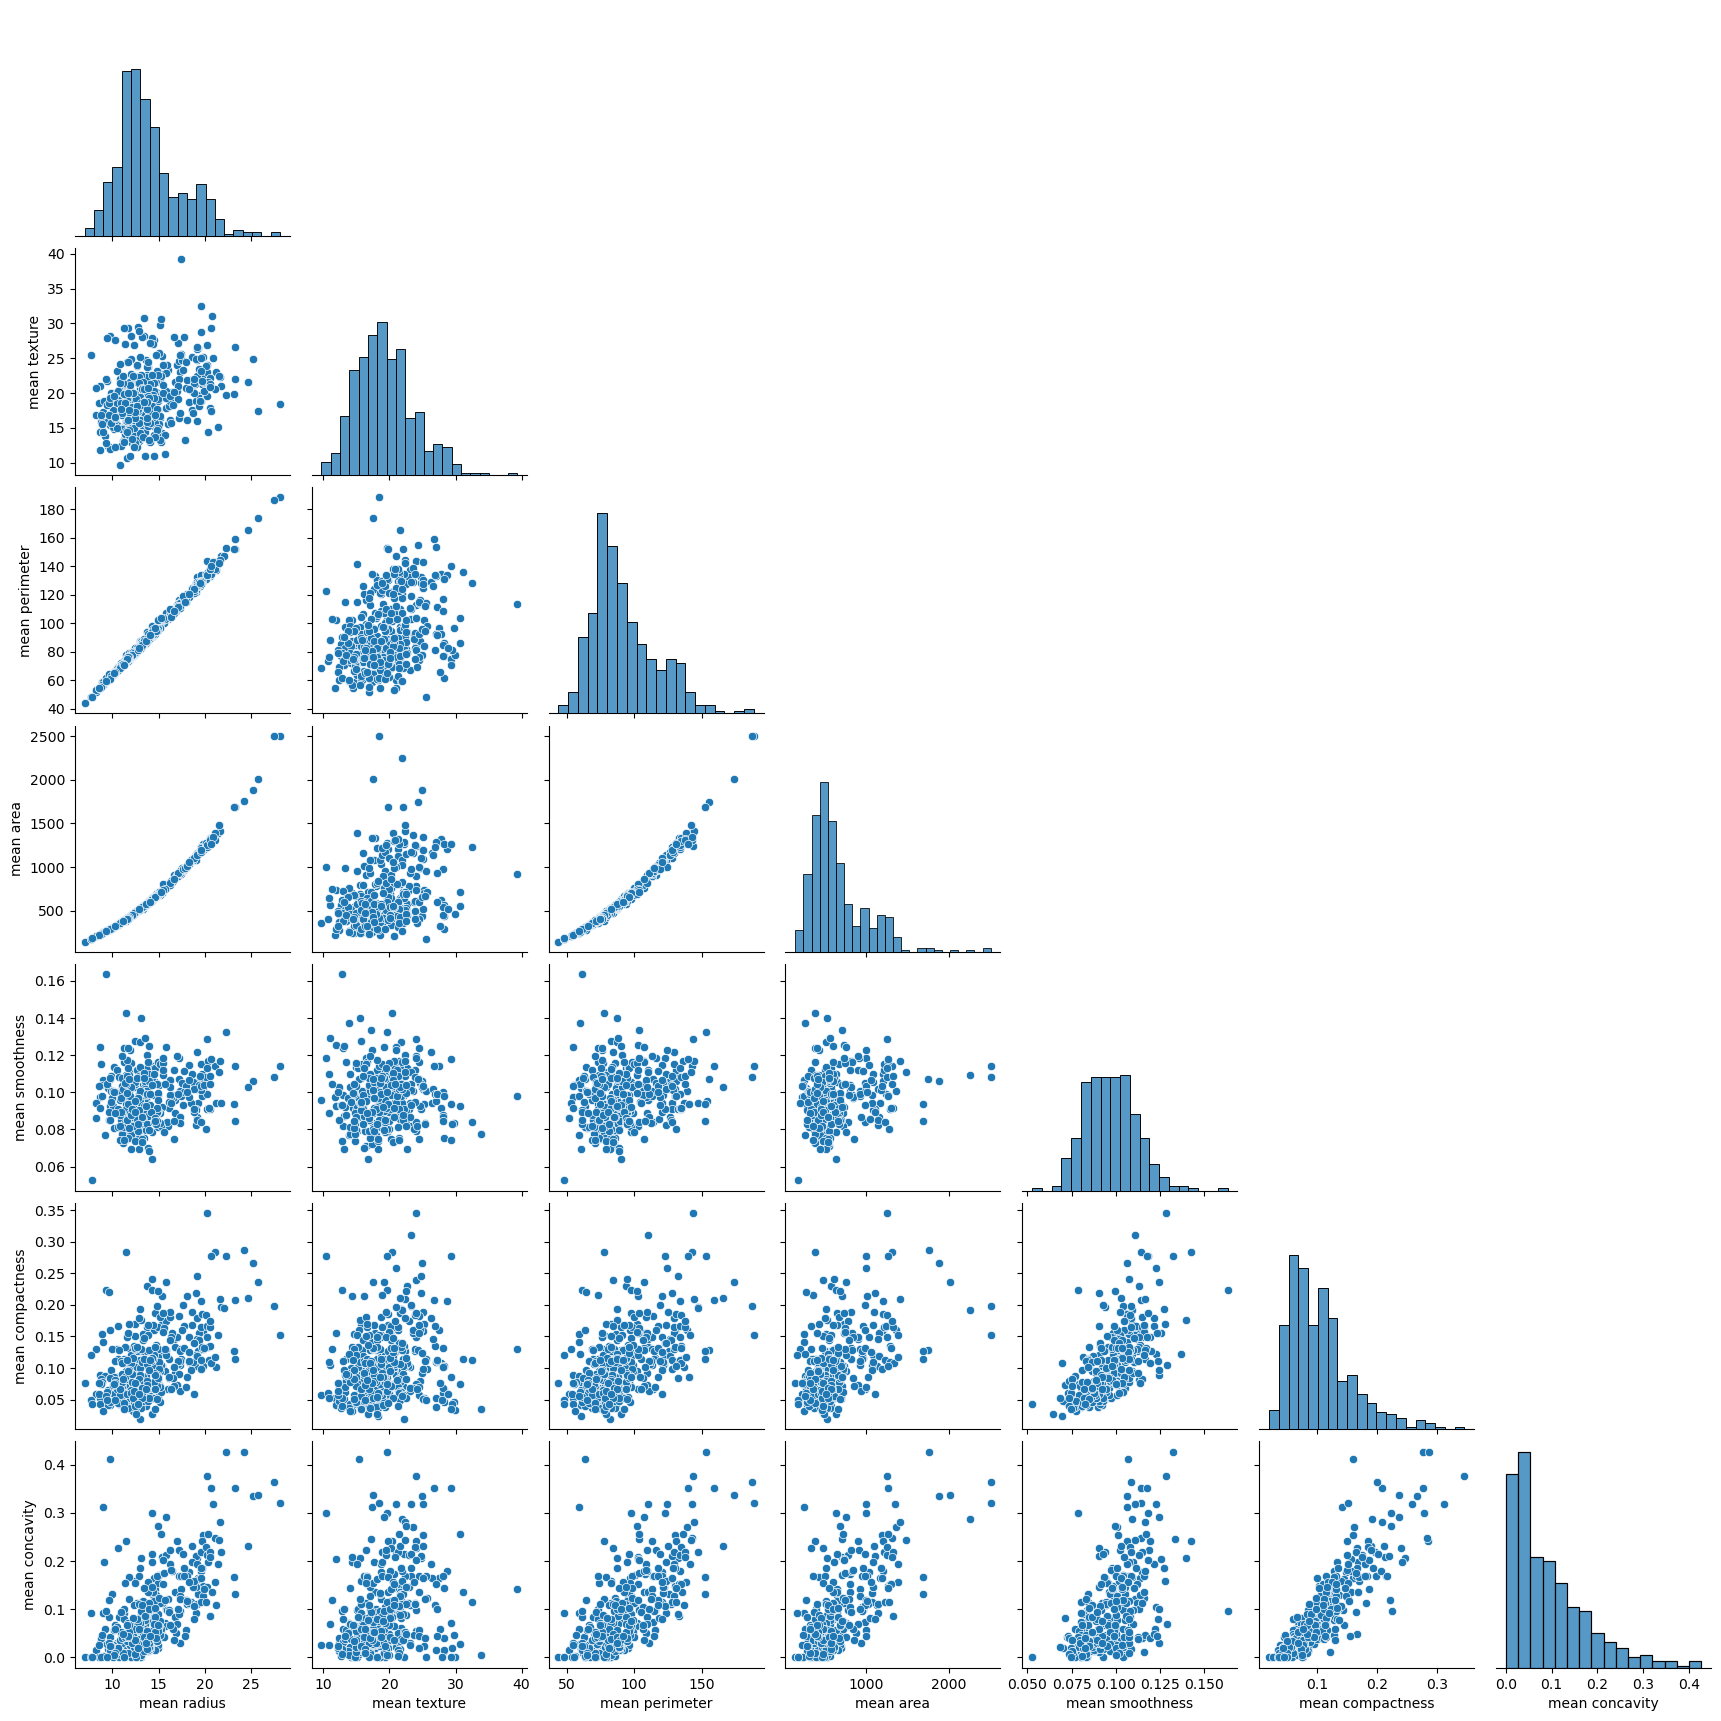

In [17]:
#scatter
sns.pairplot(df.iloc[:,:7],corner=True)

### Interpretation

    1. From the observed scatterplots, it's evident that some variables exhibit a linear relationship, while others do not 
       show any clear relationship.

    2. Notably, mean radius demonstrates a strong positive correlation with both mean area and mean perimeter, 
       indicating multicollinearity among these variables. This suggests that including all three variables in a predictive 
       model may lead to redundancy or instability in the model coefficients.

    3. While these observations are based on a sample, it's essential to conduct similar analyses for all predictors 
       in the dataset to comprehensively understand the relationships and identify any multicollinearity issues across 
       the entire dataset.

### Pair plot using Kernerl Density Plot

Creating a pair plot with kernel density plots involves visualizing the pairwise relationships between variables using kernel density estimates instead of scatterplots. Kernel density plots provide smooth estimates of the distribution of each variable along the diagonal and bivariate density estimates off-diagonal. This visualization can offer insights into the joint distribution of variables and highlight potential patterns or correlations in the data.

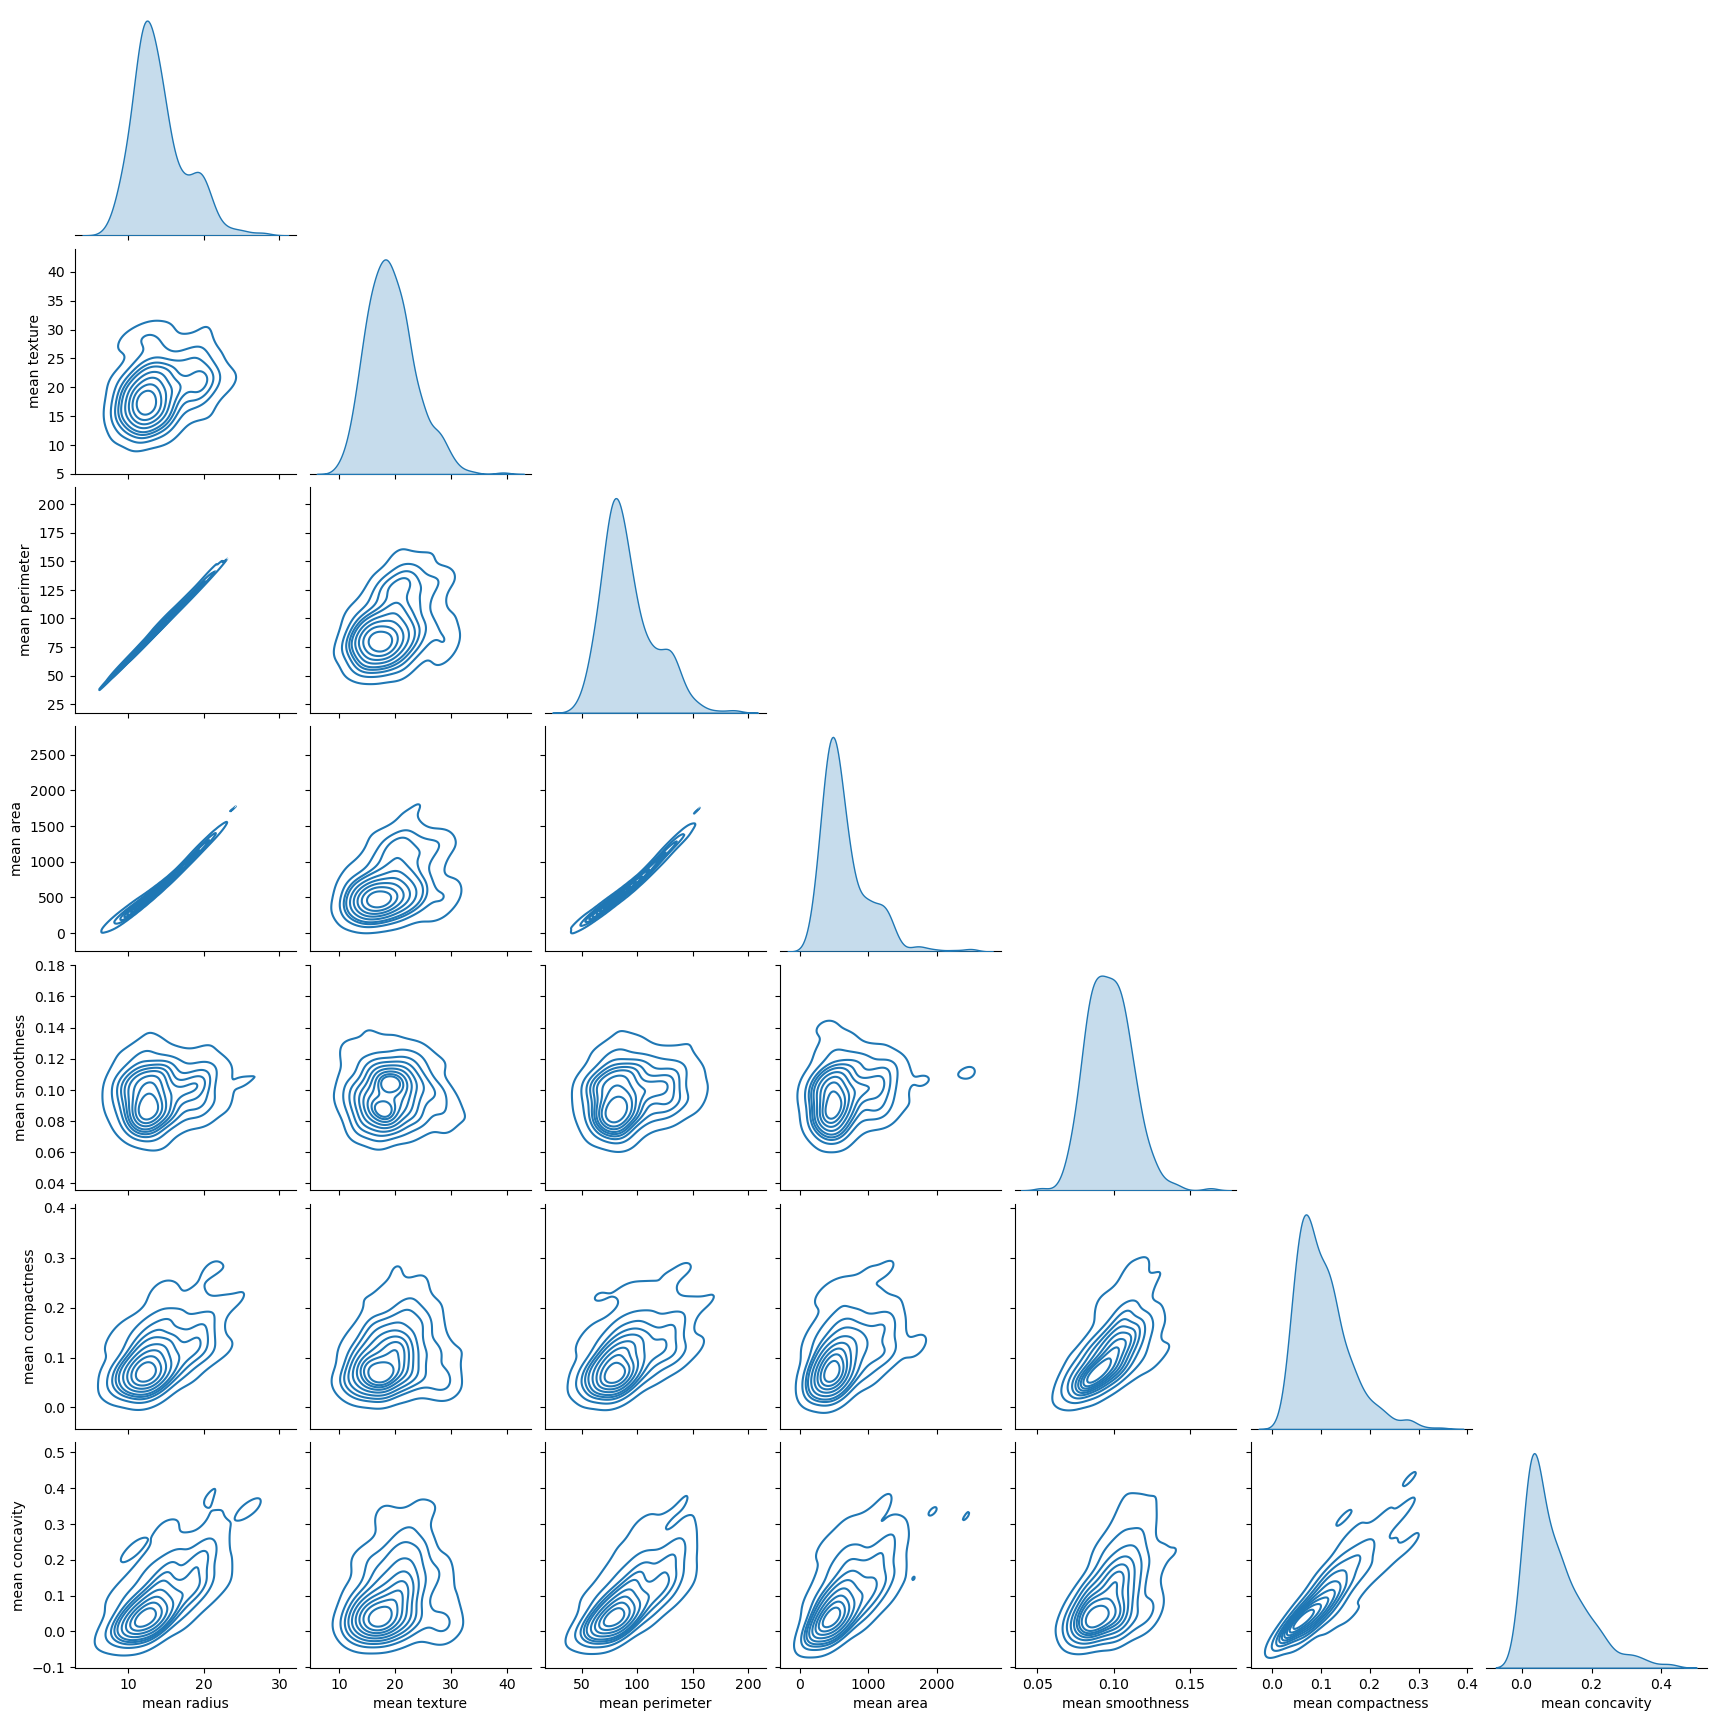

In [43]:
sns.pairplot(df.iloc[:,:7],kind='kde',corner=True)

In [44]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

### Pair Plot with hue of target class

Creating a pair plot with the hue of the target class allows for visualizing how features are distributed across different classes of the target variable. By coloring the data points based on the target class, this type of pair plot provides insights into how each feature varies with respect to the target variable. 

For instance, if the 'radius error' is paired with 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', and 'fractal dimension error' and < 0.5, then it is associated with class 1, it suggests a high probability of classification into class 1 when these feature values are observed together. This type of visualization can aid in understanding feature importance and identifying potential patterns that distinguish different classes in the dataset.

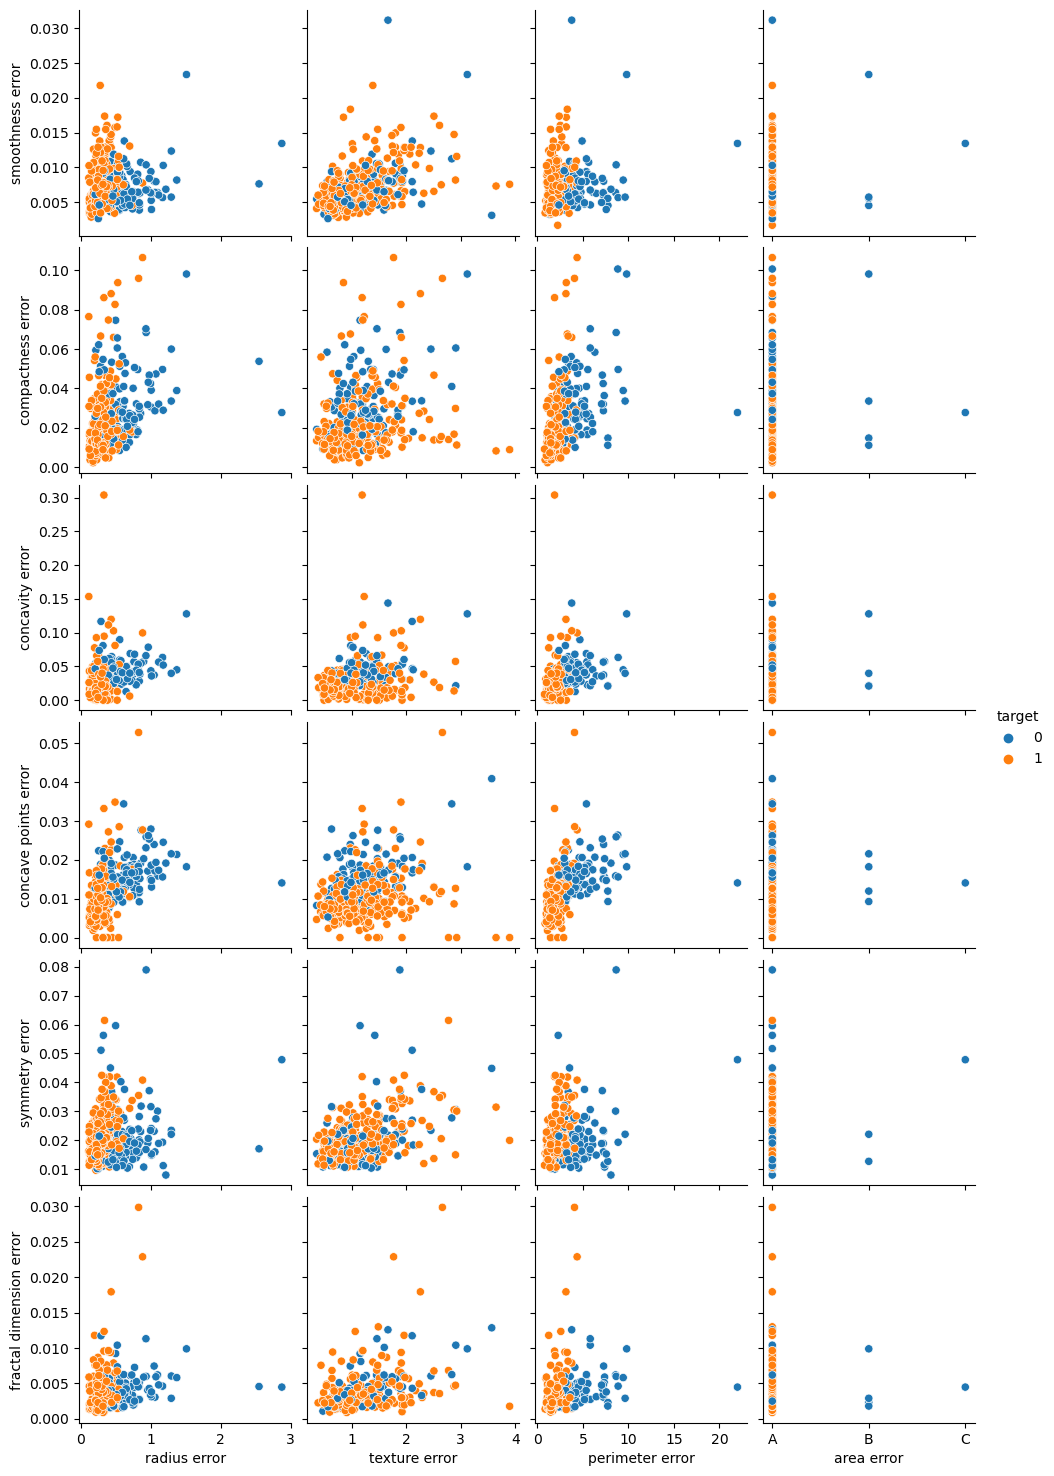

In [45]:
sns.pairplot(df,x_vars=['radius error', 'texture error', 'perimeter error', 'area error'], 
             y_vars=['smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'], hue = 'target')

### Box Plot

Box plots are useful for visualizing the distribution of numerical data through their quartiles. The box in the plot represents the interquartile range (IQR), with the median marked by a line inside the box. The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively. Any data points outside this range are considered outliers and are plotted individually. Box plots help identify the central tendency, spread, and presence of outliers in the data distribution, making them valuable tools for data exploration and analysis.

Here its clear that columns have considerable amount of outliers

<Axes: >

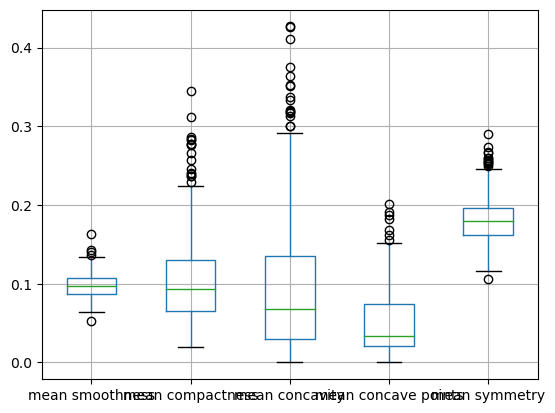

In [64]:
df.iloc[:,4:9].boxplot()

### Heat Map

Heat maps are effective visualizations for displaying the relationships between variables in a dataset. They use color gradients to represent the magnitude of values in a matrix, making it easy to identify patterns, correlations, and clusters. In the context of a correlation heat map, for example, brighter colors (such as yellow or red) indicate stronger positive correlations, while darker colors (such as blue or purple) indicate stronger negative correlations. Heat maps are particularly useful for identifying pairwise relationships in large datasets and can aid in feature selection, identifying multicollinearity, and guiding data exploration and analysis.

The numbers close to 100% are strongly correlated

In [18]:
## Selecting all Numeric columns
number_col = [col for col in df.columns if df[col].dtypes != 'O']

# Taking only absolute values as i need only the correlation visibiliy rather than positive or negative
df_corr = df[number_col].corr(method ='spearman').abs()

<Axes: >

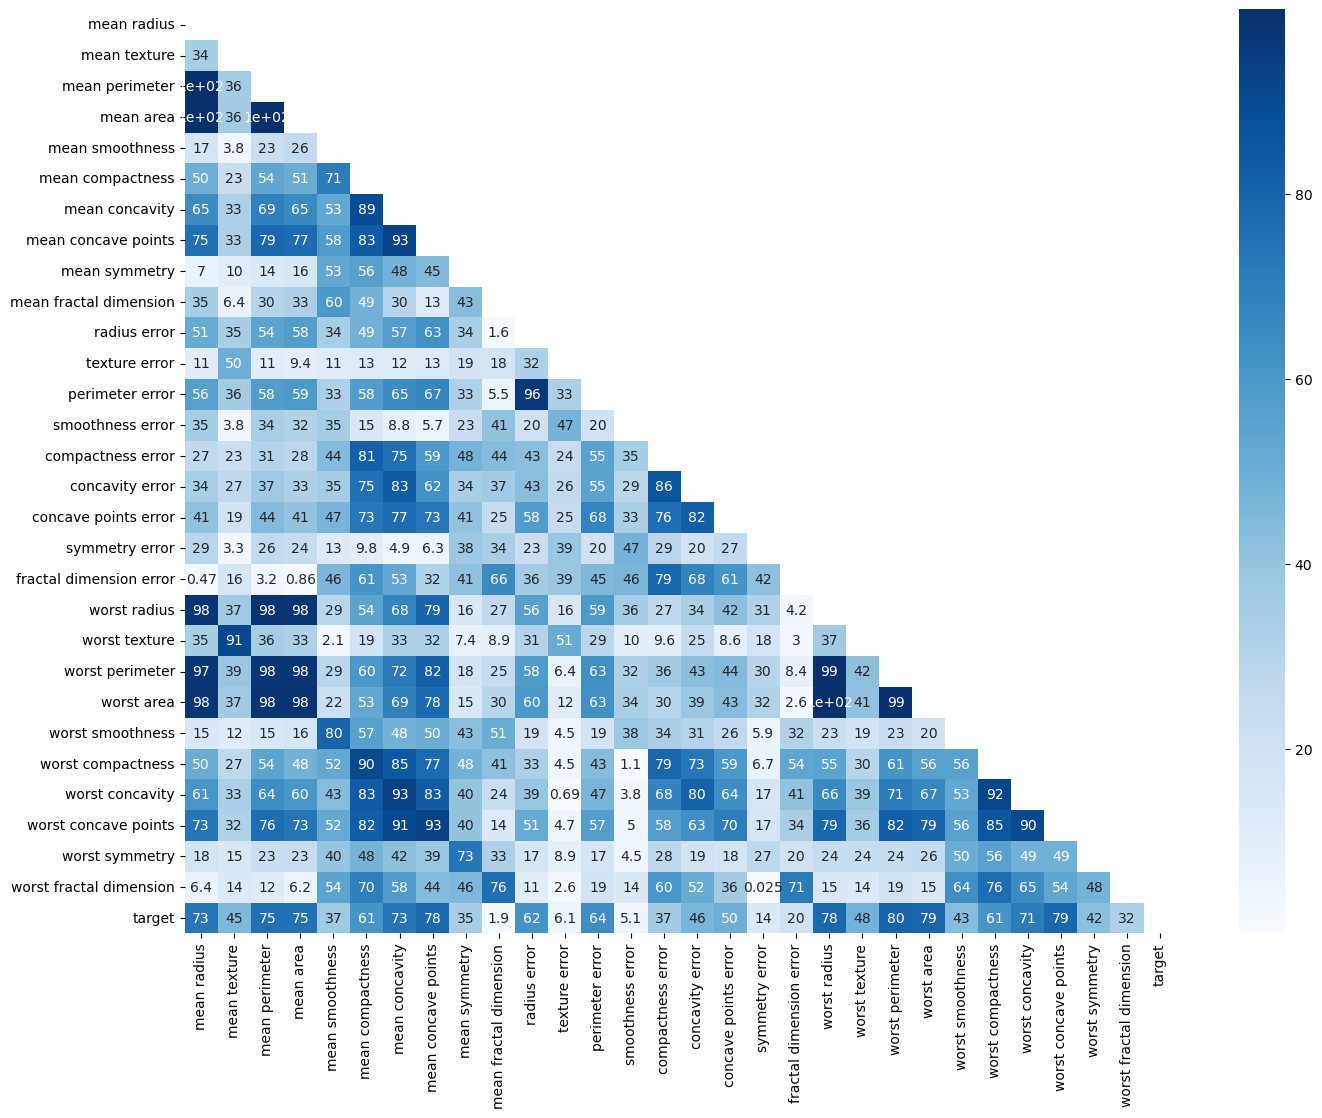

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_corr*100,annot=True,cmap='Blues',square=False,mask=np.triu(df_corr))

### Stack bar Plot

In a stacked bar plot, each bar represents a category, and the bars are divided into segments corresponding to different subcategories, here i have used target. The height of each segment represents the proportion or count of observations belonging to that subcategory within the respective category. 

Here for example, the 'worst symmetry'  value @0.2 implies the class 0 : 8 and class 1: 2 (10-8). Therefore the probility of getting class 0 is 80% (8/10*100) if value is 0.2

<Axes: xlabel='worst symmetry', ylabel='Count'>

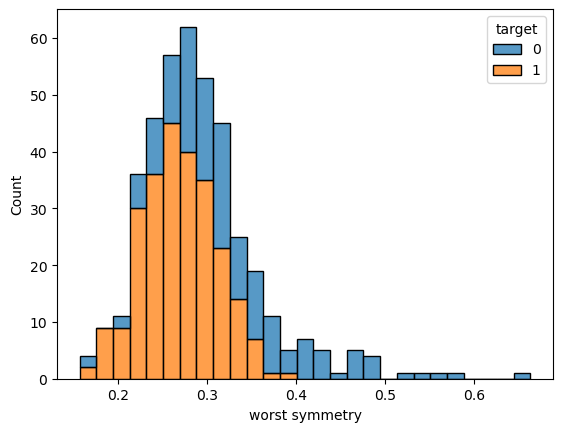

In [63]:
sns.histplot(df,x='worst symmetry',hue = 'target',multiple='stack')

## Pie Charts

Pie charts are visual representations that display data in a circular format, with each "slice" representing a proportion of the whole dataset. The size of each slice corresponds to the percentage or count of a particular category relative to the total. Pie charts are effective for illustrating the distribution of categorical data and showing the relative contribution of different categories to the whole

We use to see if target value is balanced

([<matplotlib.patches.Wedge at 0x1f8c3e97350>,
 [Text(-0.4286546999573329, 1.0130425204326268, '357'),
  Text(0.428654605109445, -1.013042560566172, '212')],
 [Text(-0.23381165452218156, 0.5525686475087055, '63%'),
  Text(0.23381160278696997, -0.55256866939973, '37%')])

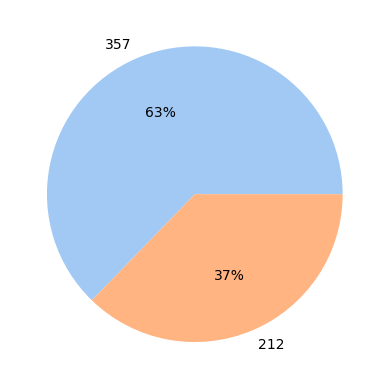

In [95]:
plt.pie(x=df['target'].value_counts(),labels=df['target'].value_counts().values,colors=sns.color_palette('pastel'),
           autopct='%.0f%%')

### Conditional Probability

Conditional probability is the likelihood of an event occurring given that another event has already occurred. It is expressed as  P(A|B), which reads as "the probability of event A given event B." 

In [23]:
#P(a | b) : Example : with given mean symmetry chances of symmetry error to occur
df.groupby('mean symmetry')['symmetry error'].apply(lambda g: g.value_counts()/len(g) * 100 ).sort_values(ascending=True)

mean symmetry         
0.1717         0.01263     25.000000
               0.02471     25.000000
               0.02279     25.000000
0.1885         0.02028     33.333333
0.1779         0.01698     33.333333
                             ...    
0.1711         0.01344    100.000000
0.1705         0.01601    100.000000
0.1704         0.02566    100.000000
0.1696         0.01673    100.000000
0.2906         0.07895    100.000000
Name: symmetry error, Length: 404, dtype: float64

### Hist plot to display mean of columns based on the target

The chances of getting class 0 is if value of 'mean symmetry' is 20 & 'symmetry error' is 2 & worst symmetry is 35

In [80]:
df_hist = df[['target','mean symmetry','symmetry error','worst symmetry']].groupby(['target']).agg([np.mean],axis=0)
df_hist

,mean symmetry,symmetry error,worst symmetry
,mean,mean,mean
target,,,
0,0.193966,0.019891,0.329151
1,0.174375,0.020957,0.268377


<Axes: xlabel='target'>

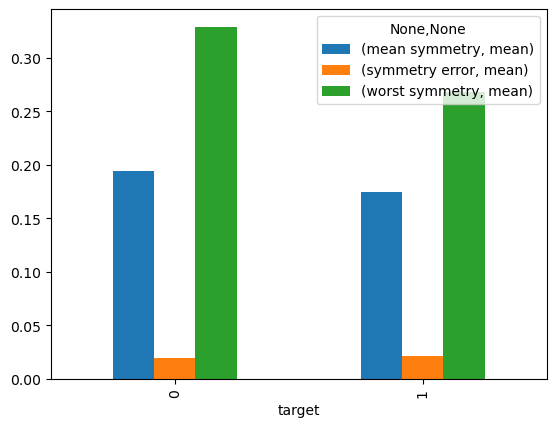

In [81]:
df_hist.plot(kind='bar')

Additional exploratory data analysis (EDA) can be conducted according to our domain expertise and the specific requirements of stakeholders. However, the methods mentioned above serve as an excellent starting point for gaining a better understanding of the data.

### Thank you..!!